<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Portfolio_Management_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

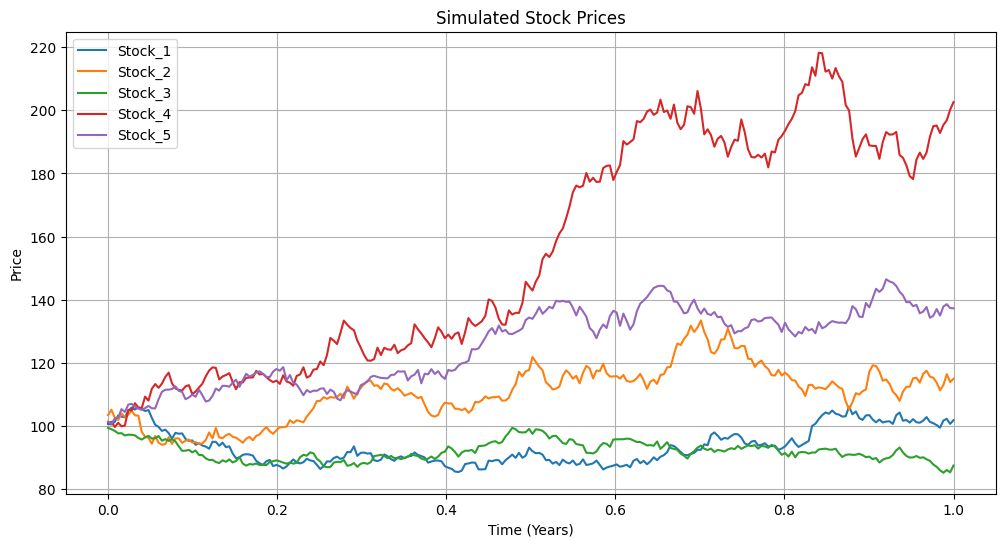

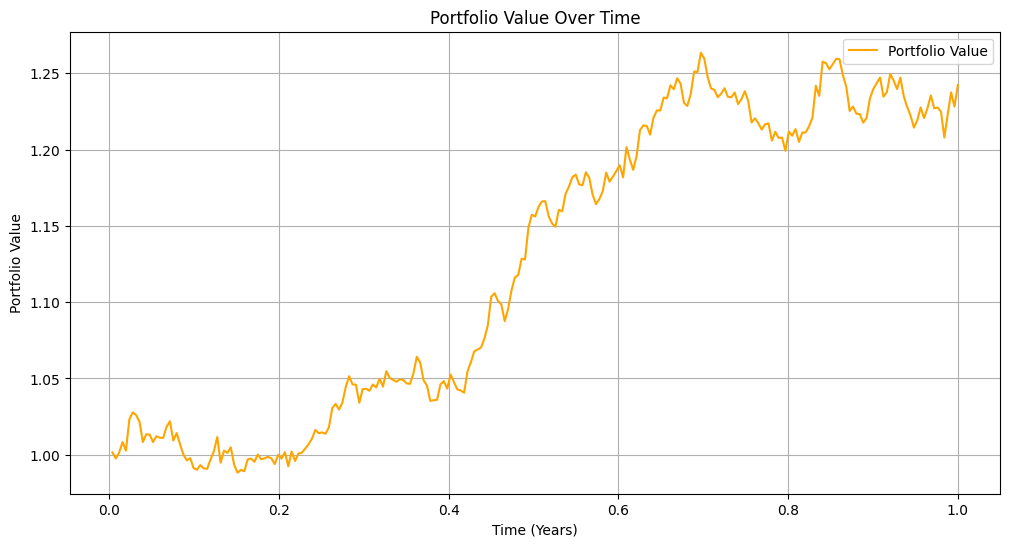

Cumulative Return: 24.24%
Annualized Return: 22.33%
Annualized Volatility: 10.29%


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Simulate stock prices using Geometric Brownian Motion
def simulate_stock_prices(S0, mu, sigma, T, dt):
    """ Simulates stock prices using Geometric Brownian Motion """
    N = int(T / dt)  # Number of time steps
    t = np.linspace(0, T, N)  # Time array
    W = np.random.standard_normal(size=N)  # Brownian motion
    W = np.cumsum(W) * np.sqrt(dt)  # Cumulative sum for Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W  # GBM formula
    S = S0 * np.exp(X)  # Stock price simulation
    return t, S

# Parameters for stock simulation
np.random.seed(42)  # For reproducibility
num_stocks = 5
S0 = [100, 100, 100, 100, 100]  # Initial stock prices
mu = [0.05, 0.07, 0.06, 0.04, 0.03]  # Expected returns
sigma = [0.2, 0.25, 0.15, 0.3, 0.2]  # Volatility
T = 1.0  # Time period in years
dt = 1/252  # Daily steps

# Step 2: Simulate prices for multiple stocks
prices = {}
for i in range(num_stocks):
    t, S = simulate_stock_prices(S0[i], mu[i], sigma[i], T, dt)
    prices[f'Stock_{i+1}'] = S

# Convert to DataFrame for analysis
price_df = pd.DataFrame(prices, index=t)

# Step 3: Portfolio Construction
# Assume equal weights for simplicity
weights = np.ones(num_stocks) / num_stocks
portfolio_returns = (price_df.pct_change().dropna() * weights).sum(axis=1)

# Step 4: Portfolio Performance Analytics
portfolio_value = (1 + portfolio_returns).cumprod()  # Cumulative returns
# Get the last element using .iloc[-1] for position-based indexing:
cumulative_return = portfolio_value.iloc[-1] - 1  # Total return
annualized_return = np.mean(portfolio_returns) * 252  # Annualized return
annualized_volatility = np.std(portfolio_returns) * np.sqrt(252)  # Annualized volatility

# Step 5: Visualization
plt.figure(figsize=(12, 6))
plt.plot(price_df, label=price_df.columns)
plt.title('Simulated Stock Prices')
plt.xlabel('Time (Years)')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label='Portfolio Value', color='orange')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time (Years)')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid()
plt.show()

# Step 6: Print Portfolio Performance Metrics
print(f"Cumulative Return: {cumulative_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Annualized Volatility: {annualized_volatility:.2%}")
